In [ ]:
!pip install river==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.7.0-cp310-cp310-linux_x86_64.whl size=2361402 sha256=4db0a1d0c37e124a74b5931fd74ae4deb3cad8b91dcfd3cdf28f5cedeeb3fca5
  Stored in directory: /root/.cache/pip/wheels/71/e9/7e/105173d51ebb5262f6f2dc4f6a5003ec86365255e8fd989733
Successfully built river


In [ ]:
!pip install memory-profiler

In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=6f52dd408936ef1e6c3e072221e29fcefeeb0ae7bb205bd0f807190dee0217e6
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from river import metrics
from river import stream
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic/word2vec_embeddings_3.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,-0.282402,0.266967,0.065208,-0.028991,-0.007023,-0.771427,0.232273,1.207871,-0.591220,-0.309825,...,0.042316,0.310536,0.162041,0.959328,0.440757,0.254530,-0.369880,0.145212,-0.116297,1
1,-0.291088,0.254678,0.064866,-0.057217,-0.062241,-0.777611,0.250659,1.273771,-0.543295,-0.394929,...,0.054725,0.335485,0.092124,0.927354,0.550294,0.228266,-0.344106,0.213569,-0.058613,2
2,-0.261362,0.254425,0.068230,-0.053486,-0.033278,-0.689748,0.213416,1.108689,-0.507155,-0.327768,...,0.065789,0.280096,0.091490,0.850703,0.469683,0.221899,-0.304451,0.158464,-0.077235,1
3,-0.286113,0.391083,0.128172,-0.073136,-0.001999,-0.815213,0.267318,1.340139,-0.703260,-0.387489,...,0.132497,0.319347,0.131601,1.123702,0.524509,0.338532,-0.356903,0.165753,-0.152370,1
4,-0.245734,0.306324,0.101826,-0.071761,-0.020645,-0.699376,0.215515,1.146781,-0.553634,-0.339269,...,0.098094,0.289700,0.093295,0.920155,0.471642,0.250729,-0.294243,0.149158,-0.102090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.313844,0.486717,0.127441,-0.110789,0.055357,-0.805933,0.282415,1.324012,-0.717741,-0.391278,...,0.213904,0.239798,0.090951,1.214346,0.529893,0.353217,-0.366810,0.117098,-0.188485,2
2996,-0.229370,0.246962,0.072126,-0.027051,-0.002868,-0.601071,0.194752,0.948708,-0.492534,-0.247602,...,0.043127,0.236235,0.106006,0.782842,0.347924,0.208732,-0.286824,0.131814,-0.094364,0
2997,-0.274848,0.296477,0.080733,-0.048536,-0.009738,-0.724364,0.234730,1.157373,-0.573305,-0.327971,...,0.070327,0.281320,0.104546,0.930048,0.461124,0.246414,-0.334507,0.162923,-0.096177,1
2998,-0.233363,0.249164,0.077844,-0.003231,-0.005001,-0.643630,0.205270,0.995505,-0.540571,-0.240271,...,0.018829,0.256943,0.133459,0.824737,0.344565,0.220645,-0.314877,0.141798,-0.104880,0


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.43, test_size = 0.57, shuffle=False, random_state = 0)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1290,-0.310050,0.300677,0.065016,-0.133605,-0.059403,-0.785804,0.272863,1.335785,-0.513274,-0.482336,...,0.816608,0.139094,0.327774,0.016366,0.961914,0.668297,0.239355,-0.318937,0.234278,-0.049346
1291,-0.193624,0.229374,0.064823,-0.041480,0.004520,-0.499604,0.165664,0.797643,-0.405902,-0.230950,...,0.482289,0.075482,0.179946,0.066667,0.664483,0.325413,0.185891,-0.223929,0.099935,-0.071775
1292,-0.286824,0.277615,0.061399,-0.131799,-0.061133,-0.741754,0.254120,1.270901,-0.478833,-0.464455,...,0.783563,0.134182,0.314118,0.011466,0.906982,0.641650,0.224346,-0.292937,0.226338,-0.045792
1293,-0.242502,0.291384,0.085841,-0.013633,0.013289,-0.648230,0.213737,1.004601,-0.563222,-0.242409,...,0.577940,0.044770,0.243683,0.129756,0.874645,0.339446,0.240016,-0.323188,0.130466,-0.125732
1294,-0.264546,0.488745,0.164198,-0.102889,0.034595,-0.791486,0.275773,1.331881,-0.763387,-0.389827,...,0.910092,0.210673,0.280192,0.124670,1.224776,0.513853,0.407311,-0.326990,0.125790,-0.219279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.313844,0.486717,0.127441,-0.110789,0.055357,-0.805933,0.282415,1.324012,-0.717741,-0.391278,...,0.854515,0.213904,0.239798,0.090951,1.214346,0.529893,0.353217,-0.366810,0.117098,-0.188485
2996,-0.229370,0.246962,0.072126,-0.027051,-0.002868,-0.601071,0.194752,0.948708,-0.492534,-0.247602,...,0.541247,0.043127,0.236235,0.106006,0.782842,0.347924,0.208732,-0.286824,0.131814,-0.094364
2997,-0.274848,0.296477,0.080733,-0.048536,-0.009738,-0.724364,0.234730,1.157373,-0.573305,-0.327971,...,0.675335,0.070327,0.281320,0.104546,0.930048,0.461124,0.246414,-0.334507,0.162923,-0.096177
2998,-0.233363,0.249164,0.077844,-0.003231,-0.005001,-0.643630,0.205270,0.995505,-0.540571,-0.240271,...,0.560564,0.018829,0.256943,0.133459,0.824737,0.344565,0.220645,-0.314877,0.141798,-0.104880


In [ ]:
%%time
import memory_profiler as mem_profile
m1 = mem_profile.memory_usage()
print('Memory (Before): ' + str(m1[0]) + ' MB' )
classifier = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                           activation='relu',
                           solver='adam',
                           batch_size=32,
                           max_iter=50)
# classifier = joblib.load('Optimized_lightGBM.pkl')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,predictions)))

m2 = mem_profile.memory_usage()
print('Memory (After) : ' + str(m2[0]) + ' MB')
print('Memory Consumption : ' + str(m2[0]-m1[0]) + ' MB')

Memory (Before): 559.2890625 MB
Accuracy: 0.7011695906432749
Memory (After) : 562.41015625 MB
Memory Consumption : 3.12109375 MB
CPU times: user 961 ms, sys: 76.2 ms, total: 1.04 s
Wall time: 1.14 s


In [ ]:
import time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# a: warining threshold, b: drift threshold, win1: sliding window size, win2: adaptive window max size
def oasw_bo(params):

    a=abs(float(params['a']))
    b=abs(float(params['b']))
    win1=int(params['win1'])
    win2=int(params['win2'])

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                           activation='relu',
                           solver='adam',
                           batch_size=32,
                           max_iter=50) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1290,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred[0])

        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {
    'a': hp.quniform('a', 0.95, 0.99, 0.001),
    'b': hp.quniform('b', 0.90, 0.98, 0.001),
    'win1': hp.quniform('win1', 200, 1000, 50),
    'win2': hp.quniform('win2', 1000, 3000, 100),
}

t1=time.time()
best = fmin(fn=oasw_bo,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print(t2-t1)

0.9530000000000001 0.9450000000000001 300 2000 0.6736842105263158
0.986 0.973 700 2700 0.6771929824561403
0.973 0.935 900 2500 0.6929824561403509
0.9590000000000001 0.964 400 1800 0.6760233918128655
0.975 0.9520000000000001 900 1100 0.6935672514619883
0.984 0.9420000000000001 1000 2300 0.6900584795321637
0.968 0.918 300 2300 0.6853801169590643
0.962 0.913 700 2000 0.6900584795321637
0.9560000000000001 0.977 750 2100 0.6824561403508772
0.974 0.929 900 1500 0.6929824561403509
100%|██████████| 10/10 [00:20<00:00,  2.05s/trial, best loss: -0.6935672514619883]
Hyperopt estimated optimum {'a': 0.975, 'b': 0.9520000000000001, 'win1': 900.0, 'win2': 1100.0}
20.524532318115234


In [ ]:
def oasw(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                           activation='relu',
                           solver='adam',
                           batch_size=32,
                           max_iter=50) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1290,3000):

        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred[0])
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return score

In [ ]:
import optunity
import optunity.metrics

search = {
    'a': [0.95,0.99],
    'b': [0.90,0.98],
    'win1': [200,1000],
    'win2': [1000,5000],
         }

optimal_configuration, info, _ = optunity.maximize(oasw,
                                                  solver_name='particle swarm',
                                                  num_evals=10,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

0.98 0.94 563 3957 0.6742690058479532
0.97 0.92 363 2957 0.6912280701754386
0.95 0.96 763 4957 0.7005847953216374
0.95 0.93 858 3619 0.6912280701754386
0.97 0.97 458 1619 0.6695906432748538
0.98 0.91 258 4619 0.6672514619883041
0.96 0.95 658 2619 0.6678362573099416
0.965 0.9 558 3119 0.6923976608187135
0.985 0.94 958 1119 0.6859649122807018
0.975 0.92 758 4119 0.6795321637426901
{'a': 0.9500390624999999, 'b': 0.960234375, 'win1': 763.28125, 'win2': 4957.03125}
Accuracy:0.7005847953216374


In [ ]:
# Define OASW with a figure
def oasw_plot(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    metric = metrics.Accuracy()
    metric2 = metrics.Accuracy()

    i = 0
    t = []
    yt = []
    yp = []
    m = []
    m2 = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    classifier = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                           activation='relu',
                           solver='adam',
                           batch_size=32,
                           max_iter=50) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    classifier2 = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                           activation='relu',
                           solver='adam',
                           batch_size=32,
                           max_iter=50) # Train an offline LightGBM model as a comparison model
    classifier2.fit(X_train,y_train)

    for j in range(1290,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric


        y_pred2= classifier2.predict(xi2.reshape(1, -1))
        metric2 = metric2.update(yi, y_pred2[0])

        # Store the y_test, y_pred, x_test, and real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred[0])
        m2.append(metric2.get()*100)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)

            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1

    # Plot the accuracy change figure
    plt.rcParams.update({'font.size': 35})
    plt.ion()
    plt.figure(1,figsize=(24,15))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='OASW+DT, Avg Accuracy: %.2f%%'%(metric.get()*100))
    plt.plot(t,m2,'red',label='Offline DT, Avg Accuracy: %.2f%%'%(metric2.get()*100))

    #Plot the drift points
    for i in range(len(dr)):
        if i!=0:
            plt.scatter(dr[i],m[dr[i]],s=200,c='r')

    plt.legend(loc='best')
    plt.ylim(10,100)
    plt.title('NSL-KDD', fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy(%)')

    plt.draw()


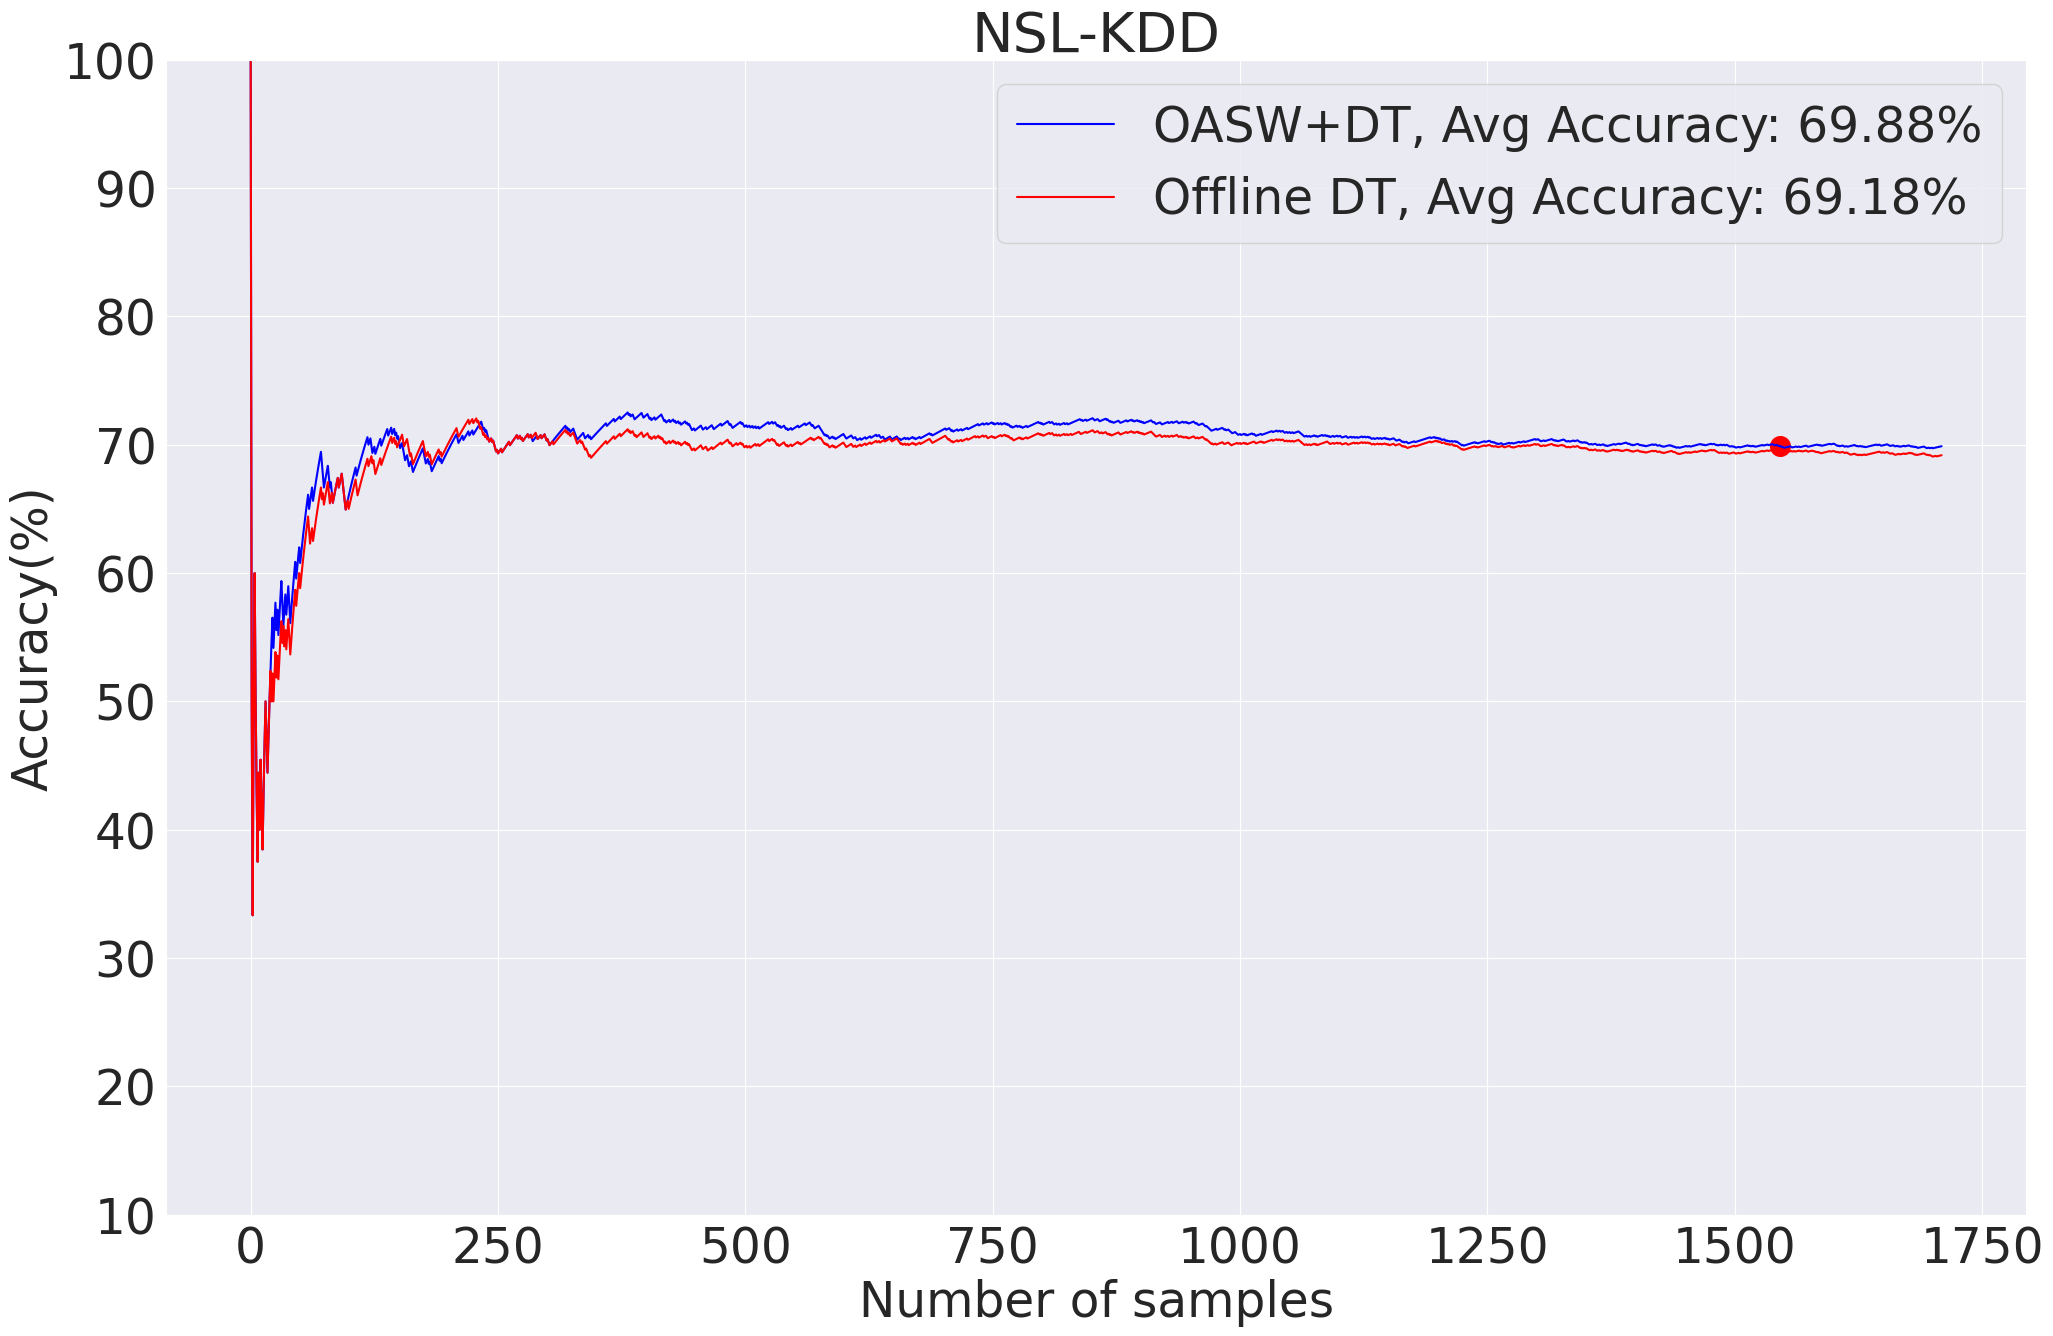

In [ ]:
oasw_plot(a= 0.9500390624999999, b= 0.960234375, win1= 763.28125, win2= 4957.03125)

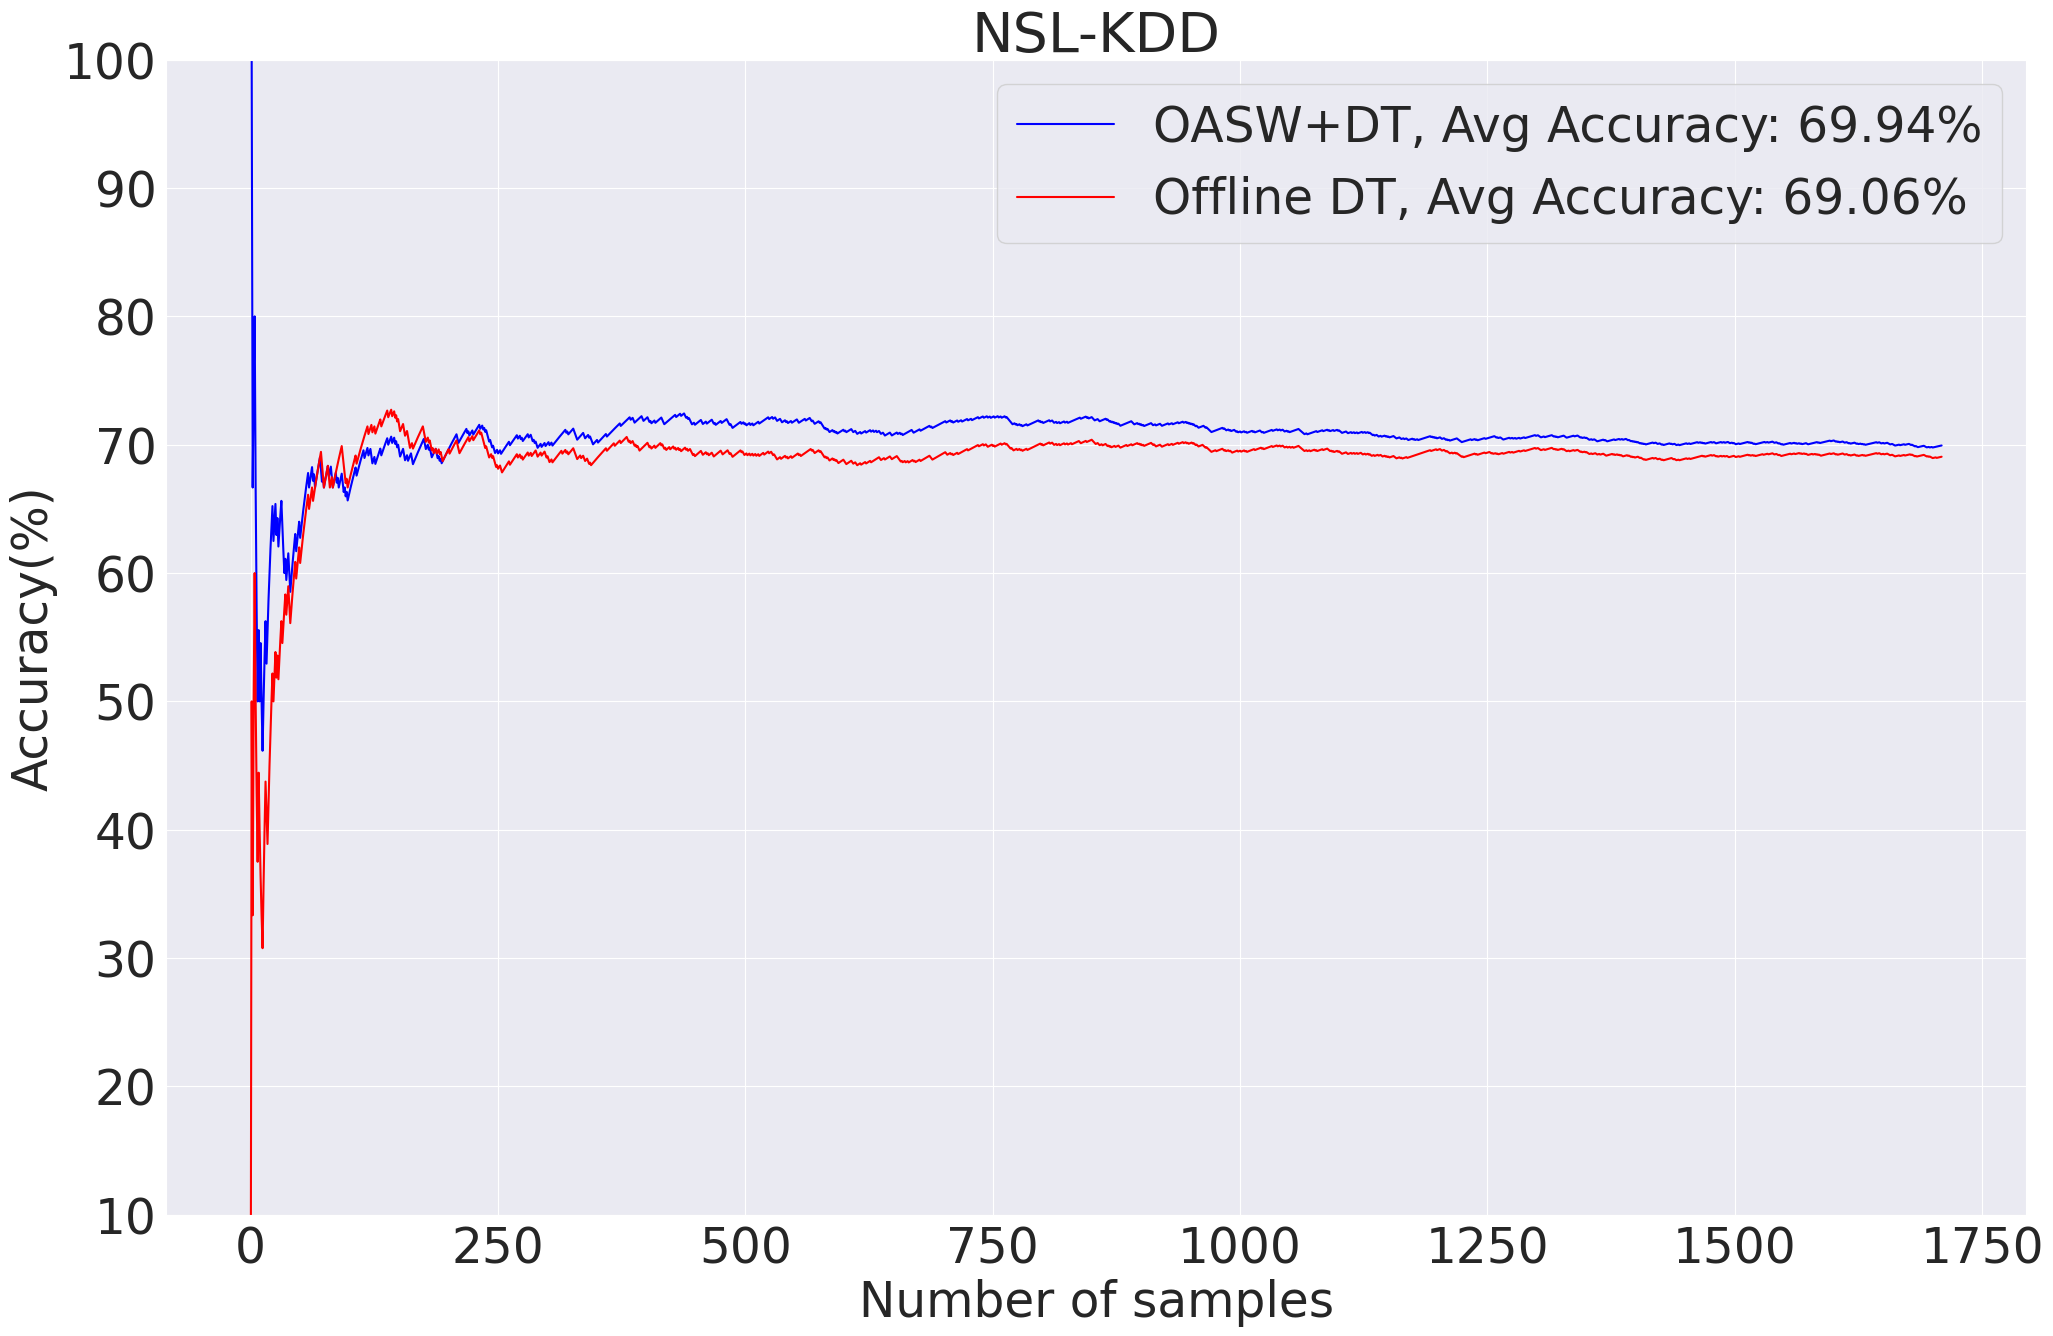

In [ ]:
oasw_plot(a= 0.975, b= 0.9520000000000001, win1= 900.0, win2= 1100.0)